# Project: Investigate a Dataset - [Patients no show appointments for may 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

The Patients noshow appointments for May 2016 dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up   to their appointment, and ‘Yes’ if they did not show up. 

# Data Description

We have a file in csv format that contains the data about to be analyzed

# Question For Analysis 

What factors are important in order to predict if a patient will or will not show up for their appointment?

In [1]:
# import libraries to the noteboook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Check the pandas version to know if there is a neccessity to update it.
pd. __version__ 

'1.4.2'

In [3]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


<a id='wrangling'></a>
## Data Wrangling
In this section of the report we will load our data, check the properties of the data, clean the data and prepare it for analysis.



### General Properties


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# exploring the shape of the dataset
df.shape

(110527, 14)

Data of 110527 Appointments(rows/ entries), under 14 different heading (columns)

In [6]:
# Check the data types of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# check for a concise summary of the dataframe,
# including the number of non-null values(missing values) in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


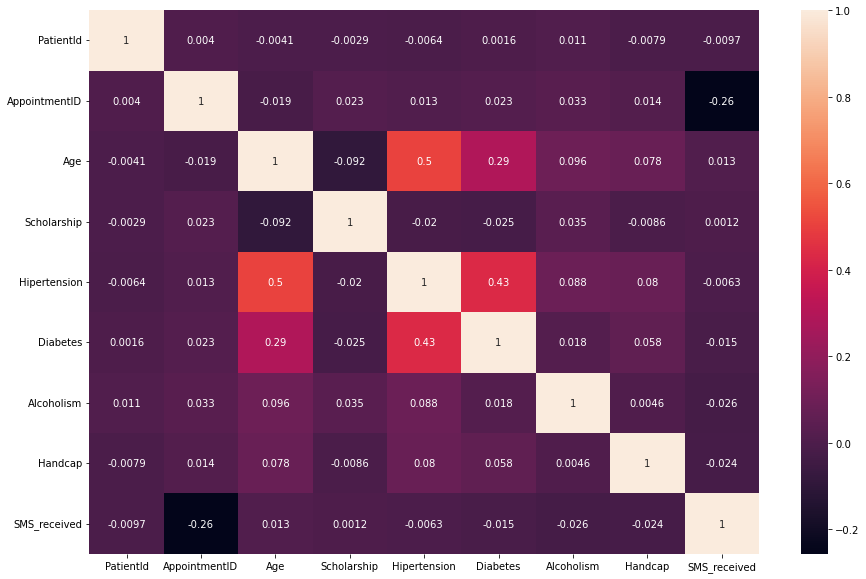

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

Looking at the heatmap above, it seems like there is some degree of corrolation between Age and Hypertension, and to a less extent, between Hypertension and Diabetes. In the next sections, we will perform more indepth analysis to confirm our preliminary findings.

Looking at the charts above, we notice the data frame includes the two types of data:

Categorical Data: Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
Quantitative Data: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay
In the next section, we will identify the exact types of each column and confirm the data analysis strategy for each column.m

In [9]:
# Check for the total missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Bravo! There are no missing data in the dataset

In [10]:
# Let us check for any duplicates
sum(df.duplicated())

0

There are no completetely repeated or duplicated values in the dataset.

In [11]:
# Let's check for the number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There are 62299 distinct patient ID, 110527 Appointment ID, 2 genders, that is male and female, 103549 ScheduledDay, 27 appointment day.

Also, 104 ages of people in 81 different neighbourhood, 2 values for scholarship whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Also,2 values for Hypertension, whether or not the patient is hypertensive, same as diabetics. 2 values for alcoholism, whether or not the patient is alcoholic addicted. 2 values for handcap, whether or not he recieved sms.

Last, 2 values for No Show, Yes for Absent and No for Not Absent.

In [12]:
# Let's check for number of unique values per column
df['PatientId'].nunique()

62299

only 62299 values are unique.

In [13]:
# Let's check the number of duplicated patientid 
df['PatientId'].duplicated().sum()

48228

There are 48228 duplicated patientid

In [14]:
# Let's check for the duplicated values for PatientId and No show to determine if there
# were PatientId status that differ in the No show status.

df.duplicated(['PatientId', 'No-show']).sum()

38710

38710 patientids have the same no show status, we will drop them

In [15]:
# let us get some useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age of the patients is 37, the minimum age is -1 which is obviously a mistake and will be dropped.

In [16]:
df.rename(columns = {'No-show':'Status'}, inplace = True)
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)

In [17]:
# in order to remove the -1 age, we need to identify the row index for it.
minage =  df.query('Age == -1')
minage

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data Cleaning

In [18]:
# Remove the columns that we would not be needing for our analysis
df.drop(['ScheduledDay','AppointmentDay'], axis=1, inplace= True)

In [19]:
# drop the row with the -1 age
df.drop(index = 99832, inplace=True)

In [20]:
# Check the data again to see the new minimum age
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
# Remove the duplicated PatientID with the duplicated No Show Status
df.drop_duplicates(['PatientId', 'Status'], inplace=True)

In [22]:
# Let’s check how many rows we have left
df.shape

(71816, 12)

Now we have 71816 rows where the patient ID has different no show status

In [23]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [24]:

# Update the values in the status, gender, scholarship, hypertension, diabetes, alcoholism, SMS_received columns
# to make them more user friendly

df['Status'] = df.Status.astype('category')
df.Status.cat.rename_categories(['Present','Absent'], inplace = True)

df['Gender'] = df.Gender.astype('category')
df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

df['Handicap'] = df.Handicap.astype('category')
df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);



/var/folders/vw/0psdrpqn00jdv4vmwk_66xp40000gn/T/ipykernel_2349/2658734947.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df.Status.cat.rename_categories(['Present','Absent'], inplace = True)
/var/folders/vw/0psdrpqn00jdv4vmwk_66xp40000gn/T/ipykernel_2349/2658734947.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df.Gender.cat.rename_categories(['Female','Male'], inplace = True)
/var/folders/vw/0psdrpqn00jdv4vmwk_66xp40000gn/T/ipykernel_2349/2658734947.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical objec

In [25]:
# Define a new column to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

In [26]:
# Create a new dataframe to limit patients to those who are based in one of the top 15 neibhourhoods 
# with the highest numbers of appointments.

## Step one: Create a list of the top 20 neibhourhoods with the highest numbers of appointments.

top_15_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(15).index)

## Step two: Create a new dataframe based on the list above

df_top_15_Nbrhd = df[df['Neighbourhood'].isin (top_15_Nbrhd_list)]

## Step three: apply filteration on the Status column to include the NoShow records only

df_top_15_Nbrhd_NoShow = df_top_15_Nbrhd[df_top_15_Nbrhd['Status']=='NoShow']

In [27]:
# Limit our dataset to appointments with NoShowUp status and use this 

NoShow_df = df[df['Status'] == 'NoShow']

# Summary of Data Wrangling

I loaded our data  and checked a few samples, I also checked the shape of the data to check the number of samples. I also checked 

# Exploratory Data Analysis 

Now that I have trimmed and cleaned the data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that is posed in the Introduction section.

# Questions
- What is the overall appointment show-up vs. no show-up rate?

- What are the proportions of the different categories within each variable and the show-up rates broken down by category?

- Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients? (the term recurring patients will be defined in the coming sections)

- For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. A step-by-step process will be provided to explain how this step will be performed. The purpose of this analysis is to serve as a starting point to identifying the factors that they may be contributing to the patients missing their appointments.

Note: This analysis is not meant to be providing a final conclusion on the reasons leading to patients missing their appointments as it doesn't involve using any inferential statistics techniques/machine learning algorithms; the scope of this project has been customized to meet specific objectives; and the project will be revisited as we progress in the course to utilize more advanced data analysis techniques/algorithms. Given the objectives of this project, We've limited our work in question 4 to 3 variables: Gender, Age, and SMS Received.

Before answering the Questions above, we will define a number of custom functions to help us conduct our analysis.

In [28]:
# Dividing the patients into their No show status
absent =df['Status'] == "Absent"
present =df['Status'] == "Present"


In [29]:
df[absent].count()

PatientId        17663
AppointmentID    17663
Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handicap         17663
SMS_received     17663
Status           17663
AgeGroup         17663
dtype: int64

In [30]:
df[present].count()

PatientId        54153
AppointmentID    54153
Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handicap         54153
SMS_received     54153
Status           54153
AgeGroup         54153
dtype: int64

17663 of the enteries were absent, while 54,153 of the entries were present.

In [31]:
percentage_present = (df[present].count())/(df[present].count()+df[absent].count())
percentage_present = percentage_present*100

In [32]:
percentage_present

PatientId        75.405202
AppointmentID    75.405202
Gender           75.405202
Age              75.405202
Neighbourhood    75.405202
Scholarship      75.405202
Hypertension     75.405202
Diabetes         75.405202
Alcoholism       75.405202
Handicap         75.405202
SMS_received     75.405202
Status           75.405202
AgeGroup         75.405202
dtype: float64

Above 75% of the enteries were present for their appointment.

In [33]:
percentage_absent = 100 - percentage_present

In [34]:
percentage_absent

PatientId        24.594798
AppointmentID    24.594798
Gender           24.594798
Age              24.594798
Neighbourhood    24.594798
Scholarship      24.594798
Hypertension     24.594798
Diabetes         24.594798
Alcoholism       24.594798
Handicap         24.594798
SMS_received     24.594798
Status           24.594798
AgeGroup         24.594798
dtype: float64

Less than one quater of the appointments had no show to be yes.

In [35]:
df[absent].describe()

,PatientId,AppointmentID,Age
count,1.766300e+04,1.766300e+04,17663.000000
mean,1.460285e+14,5.648098e+06,34.376267
std,2.540892e+14,7.487788e+04,22.192819
min,5.628261e+06,5.122866e+06,0.000000
25%,4.175306e+12,5.608286e+06,16.000000
50%,3.194149e+13,5.654232e+06,33.000000
75%,9.439503e+13,5.698457e+06,51.000000
max,9.996585e+14,5.789986e+06,115.000000


In [36]:
df[present].describe()

,PatientId,AppointmentID,Age
count,5.415300e+04,5.415300e+04,54153.000000
mean,1.468194e+14,5.672494e+06,37.229166
std,2.546249e+14,7.153670e+04,23.710145
min,3.921784e+04,5.030230e+06,0.000000
25%,4.176779e+12,5.638812e+06,17.000000
50%,3.187962e+13,5.678361e+06,37.000000
75%,9.465713e+13,5.721149e+06,56.000000
max,9.999816e+14,5.790484e+06,115.000000


from the mean we can saw people that are lesser than 35 has a slight tendency to miss their appointment as against the people that are older than age 35.

Another thing to note is that patients that were present received less SMS compared to people that were absent. 

We can pose that the SMS received doesn’t really affect the show status and the messages has be be revamped and looked into. maybe the content of the messages or the time the message was sent.

In [37]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [38]:
# An updated version of Show_No_Show_bar_plot with different font formatting 
# to match the number of column categories 

def Show_No_Show_bar_plot_V2(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [39]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)
    

In [40]:
# Create a funtion to calculate the plot the group proportions based on one variable  

def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='PatientId',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['PatientId'])*100,2)

In [41]:
# Create a function to plot the noshow-up % for two variables (i.e. gender and hypertention)

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

In [42]:
def Recurring_Patient_prct(df,var1,var2):
    
    # Pivot table to calcuate the patientID count 
    PatID_Count = pd.pivot_table(df, index=var1, columns=var2, values='PatientID',aggfunc = lambda x: len(x.unique()))
    
    # Pivot table to calcuate the AppointmentID count 
    AptID_Count = pd.pivot_table(df, index=var1, columns=var2, values='AppointmentID',aggfunc='count')
    
    # divide the two tables above to calculate the percentage and return the resulting table.
    Div_chck = np.round((1 - PatID_Count/AptID_Count)*100,2)
    
    ax = Div_chck.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(Div_chck.index,rotation = 0, fontsize = 15);
    ax.set_title('\nRecurring Patients (%)\n', fontsize = 15)
    ax.set_xlabel(Div_chck.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    
    return Div_chck


In [43]:
# Create a function to calcluate the difference between the Max and Min Show % Dimension

def RateVariance (df):
    print(' Max ShowUp (%): ', df['Present'].max(),'%\n', 
          'Min ShowUp (%):', df['Present'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Present'].max() - df['Present'].min(),2)),'%')

Present    75.41
Absent     24.59
Name: Status, dtype: float64

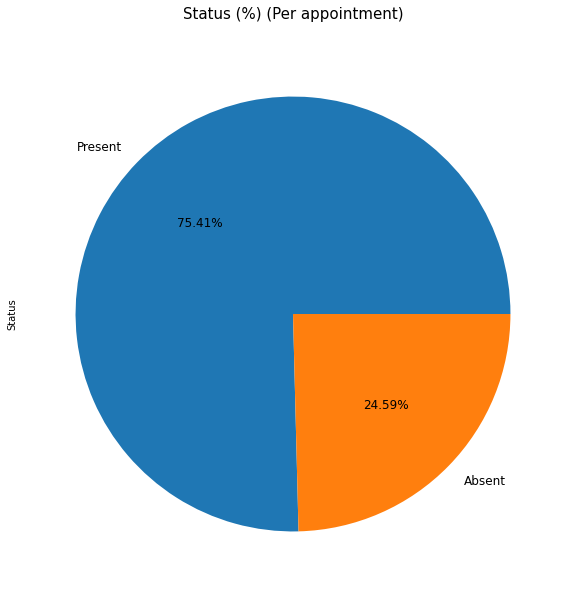

In [44]:
PropByVar(df, 'Status')

Looking at the pie chart above, the overall show-up rate is 75.41%.

### Research Question #2: What are the proportions of the different categories within each variable and the show-up rates broken down by category?
To answer this question, we will perform the following:

- Calculate the category proportions (weights) within each variable (per appointment and per patient) and present the proportions (%) in a pie chart

- Calculate the Show-up vs. No Show-up (%) for each category within each variable, plot the results in a bar chart and calculate the variance between the highest & lowest show-up rate.

Female    64.7
Male      35.3
Name: Gender, dtype: float64

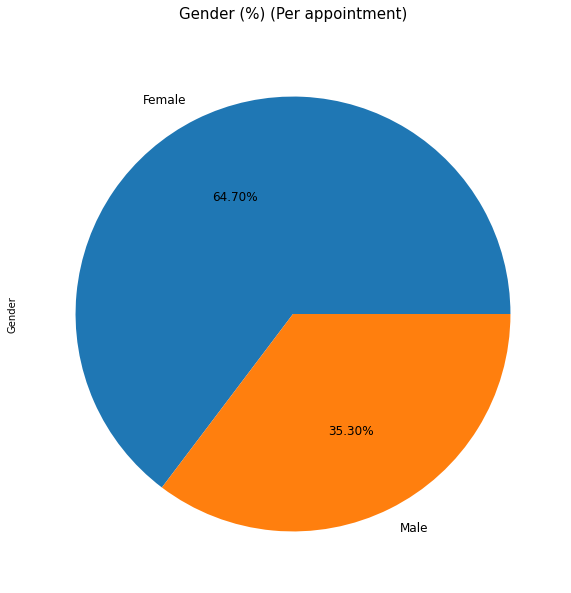

In [45]:
# Gender
PropByVar(df, 'Gender')

Looking at the chart above, we find that the appointment proportion where patients are females is 64.7%, where the proportion of appointments where patients are males is 35.3%.



/var/folders/vw/0psdrpqn00jdv4vmwk_66xp40000gn/T/ipykernel_2349/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


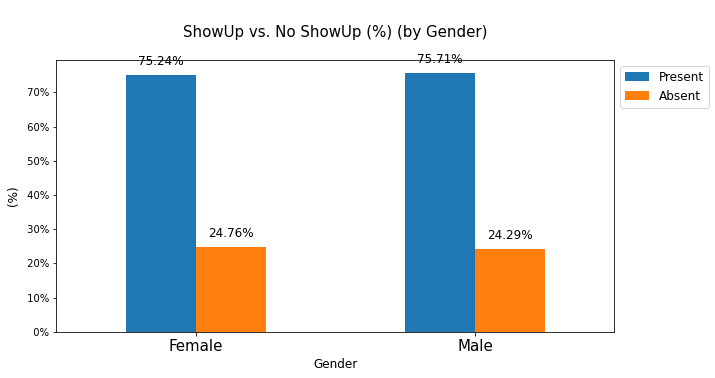

In [46]:
df_Gen = Show_No_Show_bar_plot(df, 'Gender')

Based on the initial analysis above, we found that:

The proportion of female patients is greater than the number of male patients.
The Show-up rate of male patients (per no. of appointments) is slightly greater than the show-up rate of female patients.

,PatientId
AgeGroup,
0 - 19,28.90
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.15
100 - 119,0.01


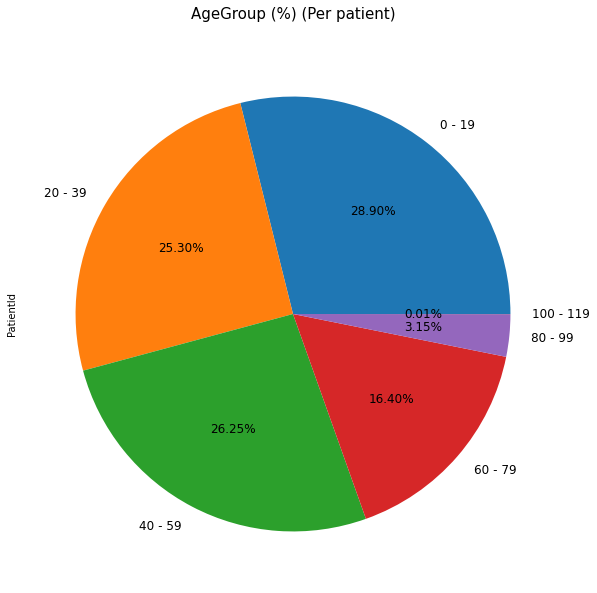

In [47]:
NumOfPatients(df, 'AgeGroup')


Looking at the chart above, we find that the patient proportion where patients are from the age group (40-59) is the largest with 26.25%, where the proportion of Patients where patients are from the age group (100 - 119) is the smallest with 0.01%

/var/folders/vw/0psdrpqn00jdv4vmwk_66xp40000gn/T/ipykernel_2349/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


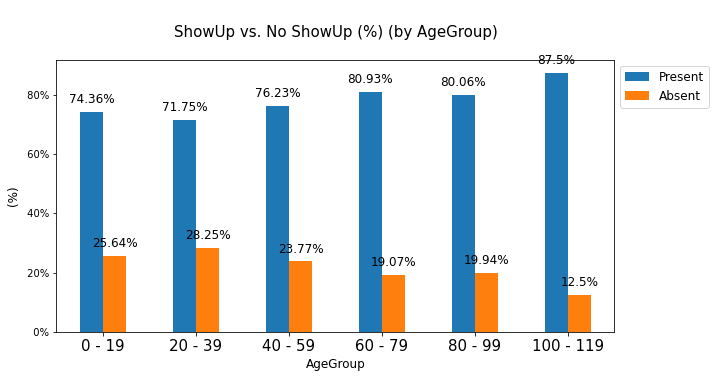

In [48]:
df_AgeGroup = Show_No_Show_bar_plot(df, 'AgeGroup')

In [49]:
RateVariance(df_AgeGroup)

 Max ShowUp (%):  87.5 %
 Min ShowUp (%): 71.75 %
 Variance (%): 15.75 %


Based on the initial analysis above, we found that:

The proportion of patients where patients are from the age group (0 -19) is largest among the other age groups, where the age group (100 - 119) is the smallest with 0.01%

The Show-up rate of age group (100 -119) (per no. of patients) is the highest with 87.5% where the show-up rate of age group (20 - 39) is the lowest with 71.75%

As mentioned before, we've limited the number of neighbourhood in our analysis to 15 (instead of 81) to include the top 15 neigbourhoods with the greatest number of appointments.

JARDIM CAMBURI       13.78
MARIA ORTIZ          11.04
RESISTÊNCIA           7.98
JARDIM DA PENHA       7.74
ITARARÉ               7.09
CENTRO                6.22
TABUAZEIRO            6.09
SANTA MARTHA          5.69
SANTO ANTÔNIO         5.40
BONFIM                5.27
JESUS DE NAZARETH     5.04
CARATOÍRA             4.89
JABOUR                4.69
SANTO ANDRÉ           4.58
SÃO PEDRO             4.51
Name: Neighbourhood, dtype: float64

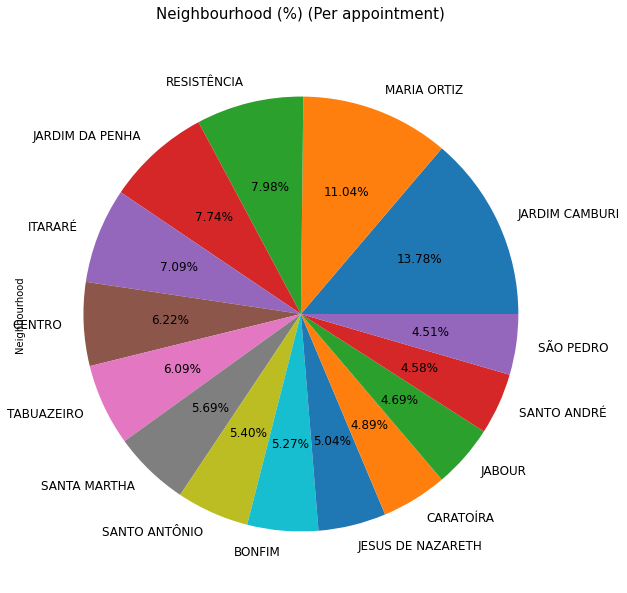

In [50]:
PropByVar(df_top_15_Nbrhd, 'Neighbourhood')

Looking at the chart above, we find that the appointment proportion where patients are based in JARDIM CAMBURI is the largest with 13.78%, where the proportion of appointments where patients are based in SAO PEDRO is the smallest with 4.51%

,PatientId
Neighbourhood,
BONFIM,5.34
CARATOÍRA,4.83
CENTRO,6.18
ITARARÉ,7.06
JABOUR,4.74
JARDIM CAMBURI,13.86
JARDIM DA PENHA,7.96
JESUS DE NAZARETH,4.75
MARIA ORTIZ,11.03


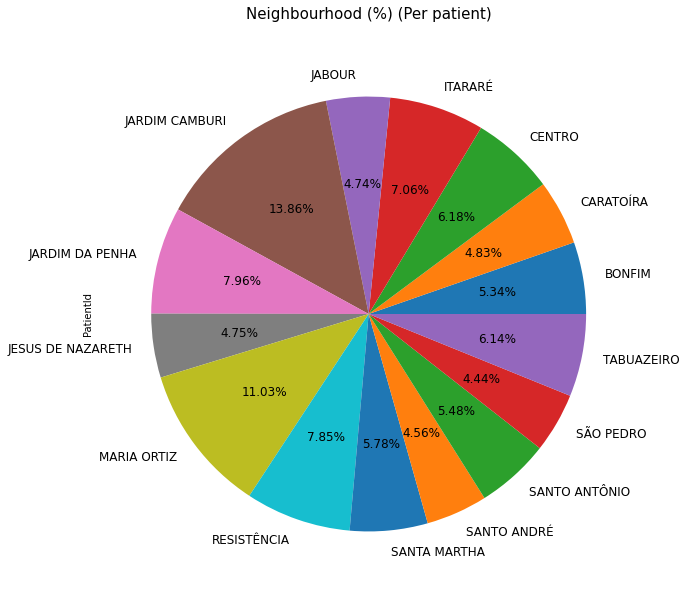

In [51]:
NumOfPatients(df_top_15_Nbrhd, 'Neighbourhood')

Looking at the chart above, we find that 13.86% of the patients are based in JARDIM CAMBURI, which is close to the proportion we got when calculating the proportions (by appointments).

/var/folders/vw/0psdrpqn00jdv4vmwk_66xp40000gn/T/ipykernel_2349/1156042281.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


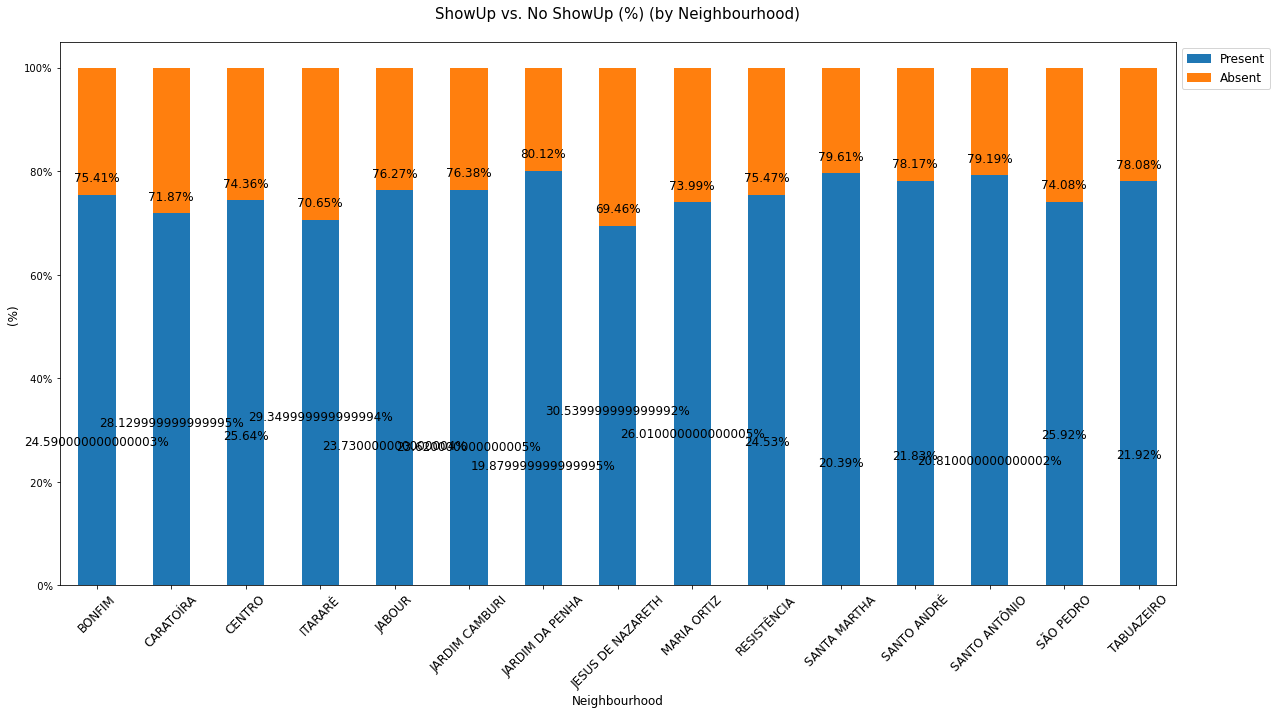

In [52]:
df_Nbrhd = Show_No_Show_bar_plot_V2(df_top_15_Nbrhd,'Neighbourhood')

In [53]:
RateVariance(df_Nbrhd)

 Max ShowUp (%):  80.12 %
 Min ShowUp (%): 69.46 %
 Variance (%): 10.66 %


### Research Question 3: Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients?

In [54]:
new_patient = np.round(df['PatientId'].nunique()/df['AppointmentID'].nunique()*100,2)
rec_patient = 100-new_patient
print('New clients(%): ' + str(new_patient) + '%\n' + 'Recurring clients(%): ' + str(rec_patient) + '%')

New clients(%): 86.75%
Recurring clients(%): 13.25%


Based on the cell above, the percentage of new patients is 86.75% & recurring patients:13.25%. Please note that Recurring Patients are a subset of New Patients, however, as they didn't show up MORE THAN ONCE they are also considered recurring.

# Conclusions
As mentioned above, this analysis is not meant to be providing a final conclusion on the reasons leading to patients missing their appointments as it doesn't involve using any inferential statistics techniques/machine learning algorithms; the scope of this project has been customized to meet specific objectives; and the project will be revisited as we progress in the course and utilize more advanced data analysis techniques/algorithms.

## Limitations & Assumptions:

Most of the calculations performed in this project are based on the number of apppointments not patients. The calculations where number of patients is referenced are explicitly highlighted.
We were not able to address the time dimenion as the appointments times were set to 00:00:00
As we were not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 data entries from the original dataset. original size 110527; new size: 110521
As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts; Histograms and other quantitative-related charts such as scatter diagrams, were excluded from this project to the same reason above.

## Questions

Our work aimed at answering the following questions:

What is the overall appointment show-up vs. no show-up rate?
What are the proportions of the different categories within each variable and the show-up rates broken down by category?
Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients? (the term recurring patients will be defined in the coming sections)
For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. A step-by-step process will be provided to explain how this step will be performed. The purpose of this analysis is to serve as a starting point to identifying the factors that they may be contributing to the patients missing their appointments.

### Preliminary Findings:

#### Proportions

The overall show-up rate is: 75.41%

The (%) of female patients is greater than male patients (64.7% vs 35.3%)

The largest Age group is (40 - 59) years old with 26.25% where the smallest is (100 - 119) years old with 0.01%

The neighbourhood with the largest (%) of appointments is JARDIM CAMURI with 13.86%; where the neighbourhood with the largest number of patients is SAO PEDRO with 4.51% of the total number of patients (based on the top-15 neighbourhood list)


#### Percentage of recurring patients vs. new patients

New clients(%): 86.75%\
Recurring clients(%): 13.25%

